In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [5]:
%%time
print(train_data.shape)
print(test_data.shape)

(42000, 785)
(28000, 784)
Wall time: 993 µs


In [10]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
train_data.isnull().sum().head(10)

pixel0    0
pixel1    0
pixel2    0
pixel3    0
pixel4    0
pixel5    0
pixel6    0
pixel7    0
pixel8    0
pixel9    0
dtype: int64

In [14]:
test_data.isnull().sum().head(10)

pixel0    0
pixel1    0
pixel2    0
pixel3    0
pixel4    0
pixel5    0
pixel6    0
pixel7    0
pixel8    0
pixel9    0
dtype: int64

In [15]:
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [16]:
test_data.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [17]:
print(train_data.columns)
print(test_data.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)


In [18]:
order=list(np.sort(train_data['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

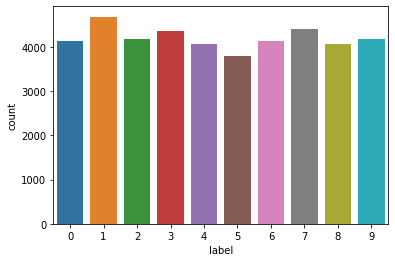

In [24]:
sns.countplot(train_data['label'])
train_data.label.astype('category').value_counts()

plt.plot(figure=(16,10))
g=sns.countplot(train_data['label'],palette ='icefire')
plt.title('Number of digits in each class')
train_data.label.astype('category').value_counts()

Text(0.5, 1.0, 'Digit 4')

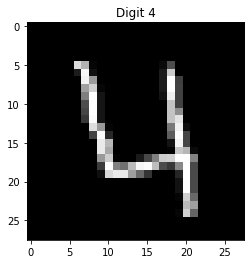

In [25]:
four=train_data.iloc[3,1:]
four.shape
four=four.values.reshape(28,28)
plt.imshow(four,cmap='gray')
plt.title("Digit 4")

In [3]:
y=train_data['label']

X=train_data.drop(columns='label')

print(train_data.shape)

(42000, 785)


In [4]:
#normalization
X=X/255.0
test_data=test_data/255.0
print("X:",X.shape)
print("test data:",test_data.shape)

X: (42000, 784)
test data: (28000, 784)


In [5]:
#scaling the features
X_scaled=scale(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=21)

linear kernel

In [34]:
%%time
lin_svc=SVC(kernel='linear')
lin_svc.fit(X_train,y_train)

lin_pred=lin_svc.predict(X_test)

Wall time: 2min 6s
Parser   : 592 ms


In [37]:
print("accuracy:",metrics.accuracy_score(y_test,lin_pred))
print(confusion_matrix(y_test,lin_pred))

accuracy: 0.9137301587301587
[[1171    0    7    2    2   13    8    0    5    2]
 [   0 1339    5    4    2    3    0    2    7    1]
 [  11   20 1121   21   12    6   11   10   19    3]
 [   8    3   47 1126    3   37    3   12   22    8]
 [  13    3   14    2 1169    1   11    6    3   45]
 [  11    6    8   57    8 1021    8    0   30    6]
 [  18    1   17    4   12   17 1205    0    3    0]
 [   1    9   24    6   11    1    1 1233    7   46]
 [   9   20   26   57    6   45   12    6 1011    8]
 [   7    4    8   15   70   10    0   43   12 1117]]


rbf kernel

In [38]:
%%time
rbf_svc=SVC(kernel='rbf')
rbf_svc.fit(X_train,y_train)

rbf_pred=rbf_svc.predict(X_test)

Wall time: 3min 53s


In [41]:
print("accuracy:",metrics.accuracy_score(y_test,rbf_pred))
print(confusion_matrix(y_test,rbf_pred))

accuracy: 0.955952380952381
[[1187    0    5    1    1    1    8    0    7    0]
 [   0 1337   10    4    2    1    1    3    4    1]
 [   3    4 1196    3    5    0    7    6    7    3]
 [   3    3   20 1196    0   15    2   14   12    4]
 [   5    2   13    0 1203    1    9    8    4   22]
 [   2    3   14   25    3 1089    8    4    7    0]
 [   6    1   22    0    3    9 1229    0    7    0]
 [   3    8   24    5    3    0    0 1271    2   23]
 [   2    6   10   14    6   10    6    2 1140    4]
 [   2    2   12    6   26    4    0   33    4 1197]]


polynomial kernel

In [42]:
%%time
poly_svc=SVC(kernel='poly')
poly_svc.fit(X_train,y_train)

poly_pred=poly_svc.predict(X_test)

Wall time: 6min 33s


In [43]:
print("accuracy:",metrics.accuracy_score(y_test,poly_pred))
print(confusion_matrix(y_test,poly_pred))

accuracy: 0.9450793650793651
[[1167    0    2    1    1    4    9    0   26    0]
 [   1 1335    4    3    2    2    0    2   14    0]
 [   3    4 1131    2   17    1    3    6   64    3]
 [   1    0   14 1179    1   10    1   11   47    5]
 [   3    2    4    0 1220    0    5    4    5   24]
 [   2    0    1   17    3 1080    7    1   36    8]
 [   3    2    1    1   11   12 1221    0   26    0]
 [   0   11   12    2   31    1    0 1218   15   49]
 [   2    1    1   12    3    9    1    0 1166    5]
 [   1    1    1    6   45    4    0   11   26 1191]]


sigmoid kernel

In [44]:
%%time
sigmoid_svc=SVC(kernel='sigmoid')
sigmoid_svc.fit(X_train,y_train)

sigmoid_pred=sigmoid_svc.predict(X_test)

Wall time: 2min 38s
Parser   : 102 ms


In [45]:
print("accuracy:",metrics.accuracy_score(y_test,sigmoid_pred))
print(confusion_matrix(y_test,sigmoid_pred))

accuracy: 0.893015873015873
[[1152    0   10    6    2   18   13    0    8    1]
 [   0 1339    3    7    3    3    0    1    7    0]
 [  19    9 1049   28   14    8   56    6   27   18]
 [   8    5   43 1111    3   43    8   24   19    5]
 [  10    2   21    3 1140    1   14   12    2   62]
 [  24   20   15   53   10  988   16    0   25    4]
 [  35    4   42    2   10   17 1158    1    8    0]
 [   5   12   21   28   17    2    2 1166    1   85]
 [  12   23   16   32    8   56    6    3 1033   11]
 [  12    4   11   12   61    5    0   57    8 1116]]


In [7]:
from sklearn.naive_bayes import GaussianNB

In [22]:
%%time
clf_gnb=GaussianNB()
clf_gnb.fit(X_train,y_train)
gnb_pred=clf_gnb.predict(X_test)

Wall time: 4.88 s


In [23]:
print("accuracy:",metrics.accuracy_score(y_test,gnb_pred))
print(confusion_matrix(y_test,gnb_pred))

accuracy: 0.530079365079365
[[1080    1    1    5    3    1   56    0   38   25]
 [   0 1303    5    6    0    1   11    1   26   10]
 [ 148   46  226  160   11   19  343    2  253   26]
 [  73   96    3  446    4    2   75    8  433  129]
 [  37   20    5    9  145    5  175    7  258  606]
 [ 136   39    4   30    3   37   88    2  695  121]
 [  12   35   10    1    1    5 1188    0   24    1]
 [   6   20    0   24   11    1    6  336   78  857]
 [  20  216    0   16    6    4   30    0  706  202]
 [   5   16    2    2    5    1    0   16   27 1212]]


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
%%time
clf_lg=LogisticRegression()
clf_lg.fit(X_train,y_train)
lg_pred=clf_lg.predict(X_test)

Wall time: 17.5 s
C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
print("accuracy:",metrics.accuracy_score(y_test,lg_pred))
print(confusion_matrix(y_test,lg_pred))

accuracy: 0.9046031746031746
[[1159    0    5    3    2   18   13    1    5    4]
 [   0 1327    4    4    2    5    0    4   15    2]
 [   9   16 1087   25   12   10   24   11   28   12]
 [   8    5   40 1113    2   44    6   15   17   19]
 [  12    4   10    1 1136    2   25   15   10   52]
 [  12    5   10   47   15  994   19    6   38    9]
 [  15    4   23    4   12   20 1188    1    9    1]
 [   4    7   19   11    8    6    0 1229    4   51]
 [  12   20   15   45    8   47   13    2 1018   20]
 [   7    6    4   13   44    8    0   41   16 1147]]


C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


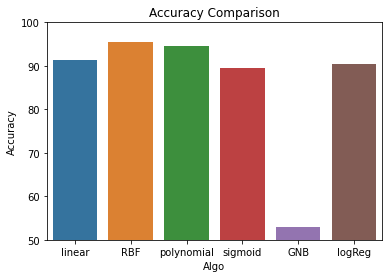

In [60]:
acc=[91.37,95.59,94.50,89.43,53.00,90.46]
name=['linear','RBF','polynomial','sigmoid','GNB','logReg']

plot=sns.barplot(name,acc,saturation=0.7)
plot.set(ylim=(50,100))
plt.title("Accuracy Comparison")
plt.xlabel("Algo")
plt.ylabel("Accuracy")
plt.show()

C:\Users\apratim sadhu\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


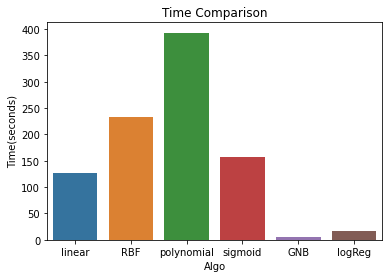

In [61]:
acc=[126,233,393,158,4.88,17.5]
name=['linear','RBF','polynomial','sigmoid','GNB','logReg']

sns.barplot(name,acc,saturation=0.7)
plt.title("Time Comparison")
plt.xlabel("Algo")
plt.ylabel("Time(seconds)")
plt.show()